# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

/var/folders/nx/ms3g8gtn5zb094y_2h_r_plr0000gn/T/ipykernel_22429/866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


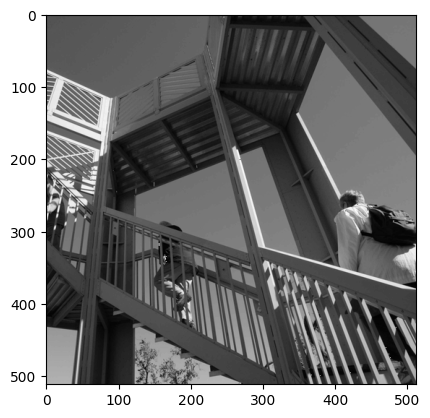

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

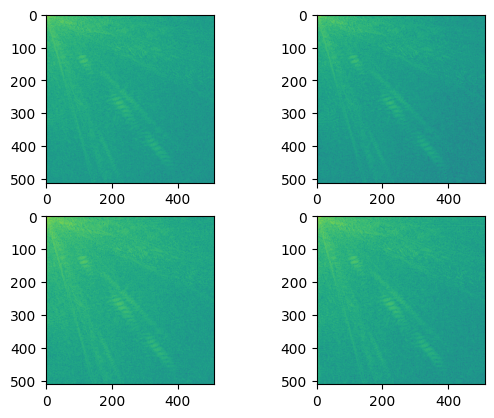

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

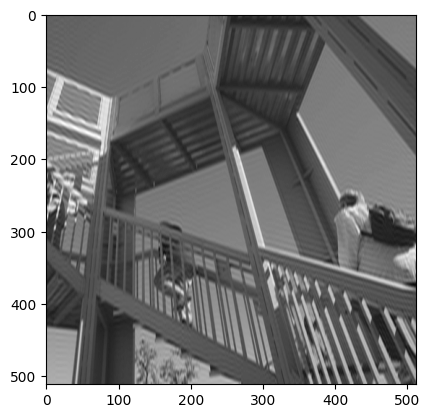

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

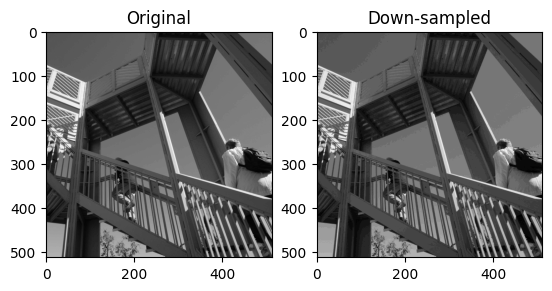

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

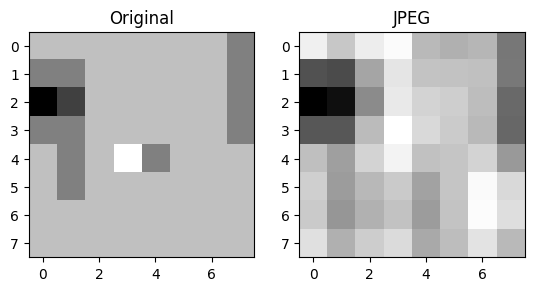

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

Componente în frecvență:250378
Componente în frecvență după cuantizare: 125029


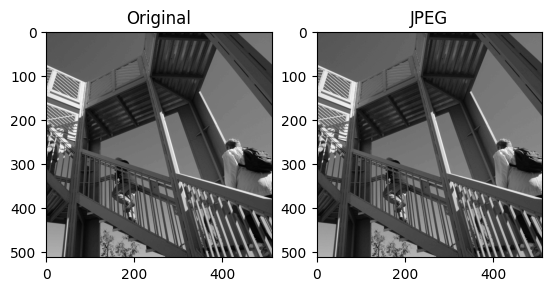

In [7]:
# Sarcina 1 

def compress_jpeg_grayscale(X):
    if X.shape[0] % 8 > 0:
        X = np.pad(X, ((0, 8 - X.shape[0] % 8), (0, 0)), mode='constant')
    if X.shape[1] % 8 > 0:
        X = np.pad(X, ((0, 0), (0, 8 - X.shape[1] % 8)), mode='constant')

    Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
            [12, 12, 14, 19, 26, 28, 60, 55],
            [14, 13, 16, 24, 40, 57, 69, 56],
            [14, 17, 22, 29, 51, 87, 80, 62],
            [18, 22, 37, 56, 68, 109, 103, 77],
            [24, 35, 55, 64, 81, 104, 113, 92],
            [49, 64, 78, 87, 103, 121, 120, 101],
            [72, 92, 95, 98, 112, 100, 103, 99]]

    compressed = np.zeros(X.shape)
    Y_nnz = 0
    Y_jpeg_nnz = 0
    for i in range(0, X.shape[0], 8):
        for j in range(0, X.shape[1], 8):
            x = X[i:i+8, j:j+8]
            y = dctn(x)
            y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
            compressed[i:i+8, j:j+8] = idctn(y_jpeg)
            y_nnz = np.count_nonzero(y)
            y_jpeg_nnz = np.count_nonzero(y_jpeg)
            Y_jpeg_nnz += y_jpeg_nnz
            Y_nnz += y_nnz

    print('Componente în frecvență:' + str(Y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(Y_jpeg_nnz))
    
    return compressed

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(compress_jpeg_grayscale(X), cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

/var/folders/nx/ms3g8gtn5zb094y_2h_r_plr0000gn/T/ipykernel_22429/1327332048.py:80: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = scipy.misc.face()


Componente în frecvență:1731949
Componente în frecvență după cuantizare: 296809


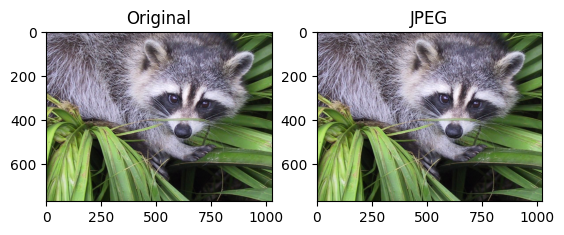

In [8]:
# Sarcina 2 
import scipy 

def rgb_to_ycbcr(X):
    X = X.astype(np.float32)
    Y = 0.299*X[:,:,0] + 0.587*X[:,:,1] + 0.114*X[:,:,2]
    Cb = 128 - 0.168736*X[:,:,0] - 0.331264*X[:,:,1] + 0.5*X[:,:,2]
    Cr = 128 + 0.5*X[:,:,0] - 0.418688*X[:,:,1] - 0.081312*X[:,:,2]
    return np.clip(np.round(np.dstack((Y, Cb, Cr))), 0, 255).astype(np.uint8)

def ycbcr_to_rgb(X):
    X = X.astype(np.float32)
    R = X[:,:,0] + 1.402*(X[:,:,2] - 128)
    G = X[:,:,0] - 0.344136*(X[:,:,1] - 128) - 0.714136*(X[:,:,2] - 128)
    B = X[:,:,0] + 1.772*(X[:,:,1] - 128)
    return np.clip(np.round(np.dstack((R, G, B))), 0, 255).astype(np.uint8)

def pad_image(X):
    pad_height = (-X.shape[0]) % 8
    pad_width = (-X.shape[1]) % 8
    return np.pad(X, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant')

def compress_jpeg_color(img):
    X = img.copy()
    X = rgb_to_ycbcr(X)

    Qy_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
            [12, 12, 14, 19, 26, 28, 60, 55],
            [14, 13, 16, 24, 40, 57, 69, 56],
            [14, 17, 22, 29, 51, 87, 80, 62],
            [18, 22, 37, 56, 68, 109, 103, 77],
            [24, 35, 55, 64, 81, 104, 113, 92],
            [49, 64, 78, 87, 103, 121, 120, 101],
            [72, 92, 95, 98, 112, 100, 103, 99]]
    
    Qc_jpeg = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
               [18, 21, 26, 66, 99, 99, 99, 99],
               [24, 26, 56, 99, 99, 99, 99, 99],
               [47, 66, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99]])

    compressed = np.zeros(X.shape)
    Y_nnz = 0
    Y_jpeg_nnz = 0
    for i in range(0, X.shape[0], 8):
        for j in range(0, X.shape[1], 8):
            for k in range(3):
                x = X[i:i+8, j:j+8, k]
                y = dctn(x)
                Q_jpeg = Qy_jpeg if k == 0 else Qc_jpeg
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                compressed[i:i+8, j:j+8, k] = idctn(y_jpeg)
                y_nnz = np.count_nonzero(y)
                y_jpeg_nnz = np.count_nonzero(y_jpeg)
                Y_jpeg_nnz += y_jpeg_nnz
                Y_nnz += y_nnz

    print('Componente în frecvență:' + str(Y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(Y_jpeg_nnz))
    
    return ycbcr_to_rgb(compressed)

X = scipy.misc.face()
Xc = compress_jpeg_color(X)

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(Xc)
plt.title('JPEG')
plt.show()

Componente în frecvență:1731949
Componente în frecvență după cuantizare: 296809
Componente în frecvență:2082431
Componente în frecvență după cuantizare: 307043
Componente în frecvență:2080406
Componente în frecvență după cuantizare: 313451
Componente în frecvență:2077320
Componente în frecvență după cuantizare: 318255
Componente în frecvență:2073933
Componente în frecvență după cuantizare: 322168
Componente în frecvență:2069785
Componente în frecvență după cuantizare: 325390
Componente în frecvență:2065605
Componente în frecvență după cuantizare: 328155
Componente în frecvență:2063773
Componente în frecvență după cuantizare: 330599
Componente în frecvență:2058216
Componente în frecvență după cuantizare: 332751
Componente în frecvență:2056234
Componente în frecvență după cuantizare: 334560
Componente în frecvență:2052535
Componente în frecvență după cuantizare: 336171
Componente în frecvență:2049676
Componente în frecvență după cuantizare: 337578
Componente în frecvență:2046897
Componen

Text(0.5, 1.0, 'JPEG')

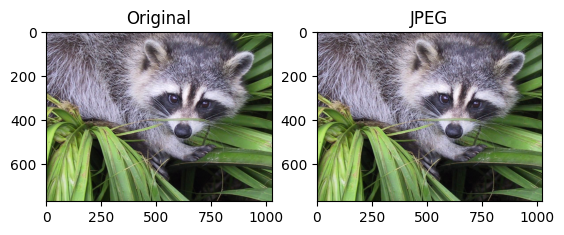

In [9]:
# sarcina 3

mse_lim = 3
Xc = X.copy()
while np.mean((X - Xc)**2) < mse_lim:
    Xc = compress_jpeg_color(Xc)

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(Xc)
plt.title('JPEG')

Componente în frecvență:2654971
Componente în frecvență după cuantizare: 486776


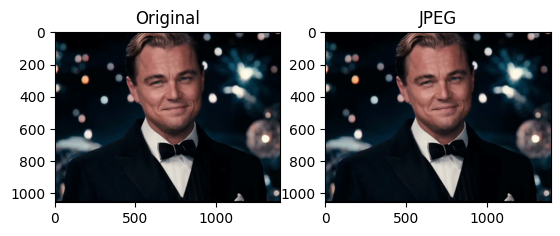

Componente în frecvență:2748077
Componente în frecvență după cuantizare: 500039


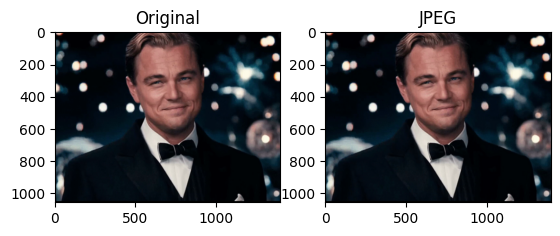

Componente în frecvență:2807792
Componente în frecvență după cuantizare: 526297


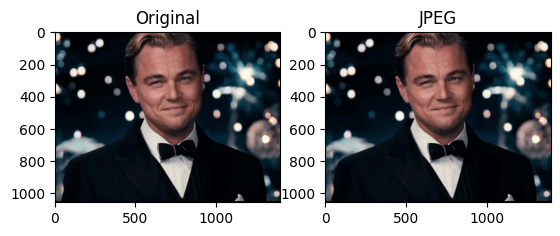

Componente în frecvență:2900670
Componente în frecvență după cuantizare: 530785


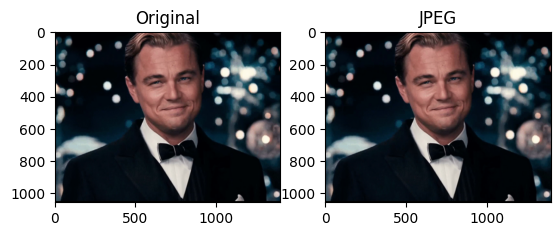

Componente în frecvență:2904395
Componente în frecvență după cuantizare: 534500


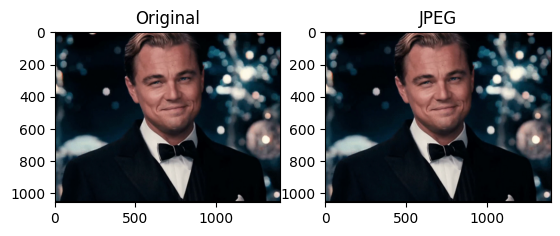

Componente în frecvență:2918172
Componente în frecvență după cuantizare: 534068


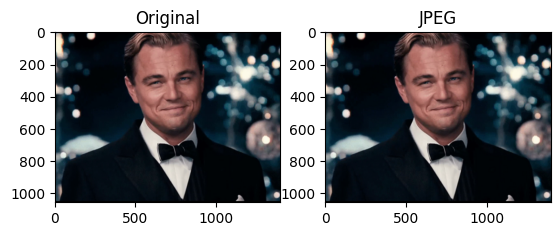

Componente în frecvență:2974711
Componente în frecvență după cuantizare: 569465


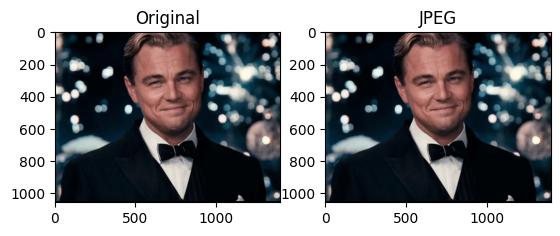

Componente în frecvență:3118524
Componente în frecvență după cuantizare: 584179


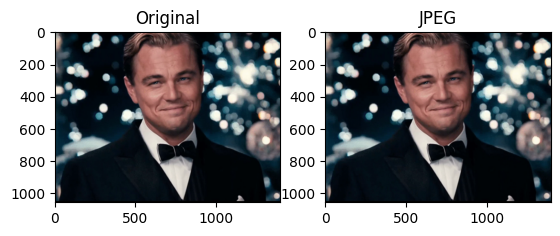

Componente în frecvență:3125808
Componente în frecvență după cuantizare: 581777


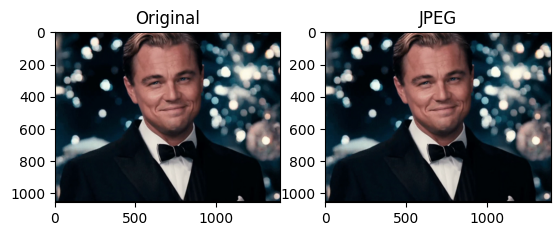

Componente în frecvență:3078663
Componente în frecvență după cuantizare: 561993


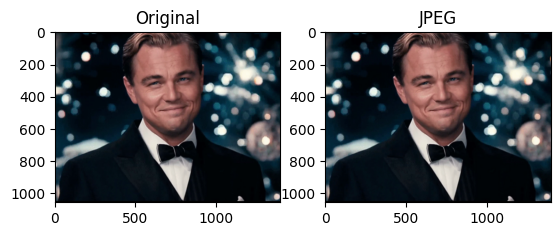

Componente în frecvență:2983755
Componente în frecvență după cuantizare: 561850


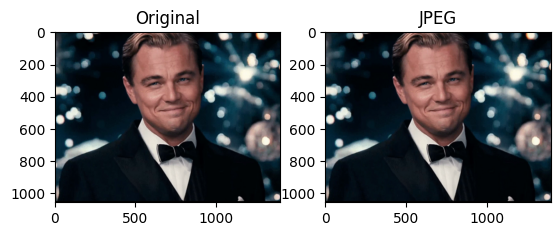

Componente în frecvență:3113009
Componente în frecvență după cuantizare: 572294


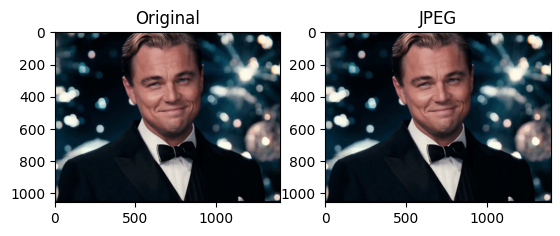

Componente în frecvență:3109003
Componente în frecvență după cuantizare: 579939


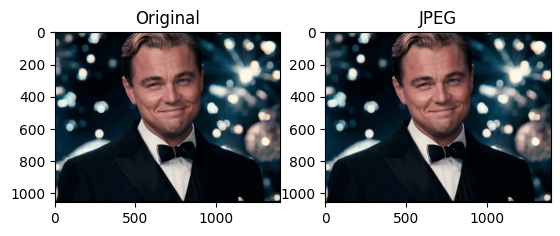

Componente în frecvență:3105483
Componente în frecvență după cuantizare: 569172


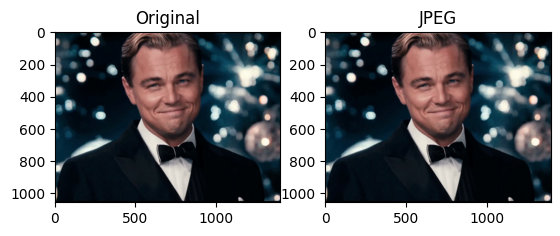

Componente în frecvență:3004099
Componente în frecvență după cuantizare: 569390


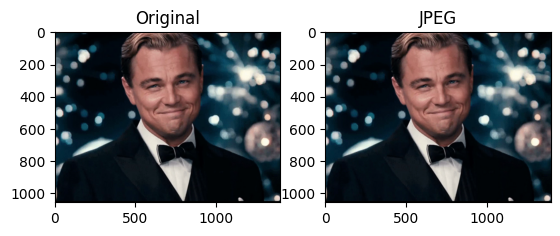

Componente în frecvență:3097134
Componente în frecvență după cuantizare: 568727


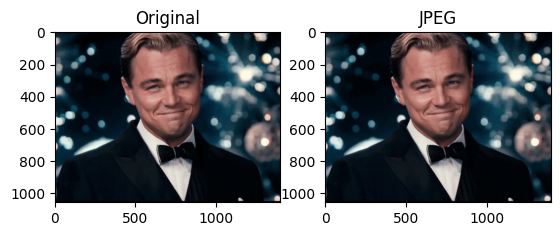

Componente în frecvență:3092567
Componente în frecvență după cuantizare: 572631


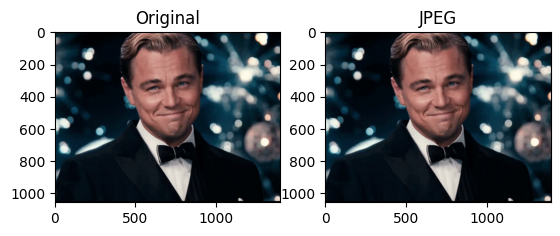

Componente în frecvență:3098443
Componente în frecvență după cuantizare: 567809


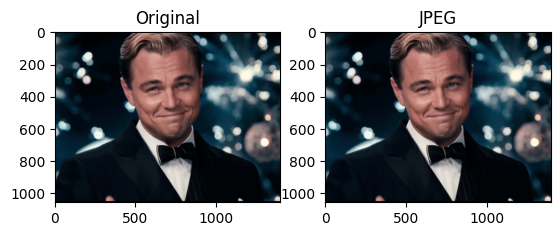

Componente în frecvență:3022629
Componente în frecvență după cuantizare: 564755


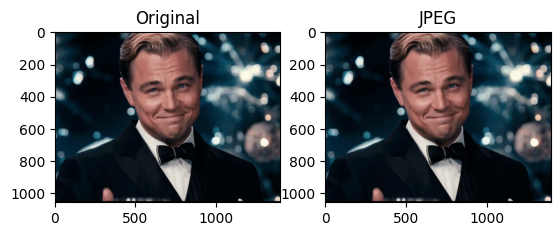

Componente în frecvență:3152519
Componente în frecvență după cuantizare: 570839


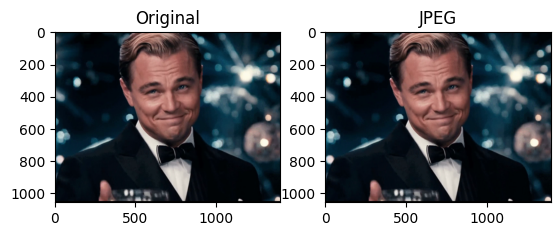

Componente în frecvență:3168419
Componente în frecvență după cuantizare: 581991


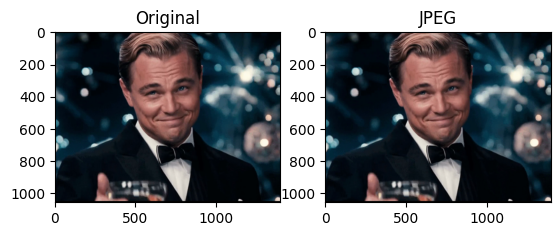

Componente în frecvență:3234333
Componente în frecvență după cuantizare: 586477


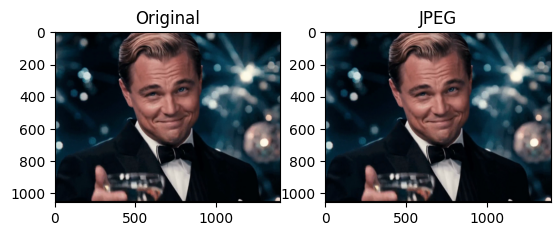

Componente în frecvență:3148510
Componente în frecvență după cuantizare: 583361


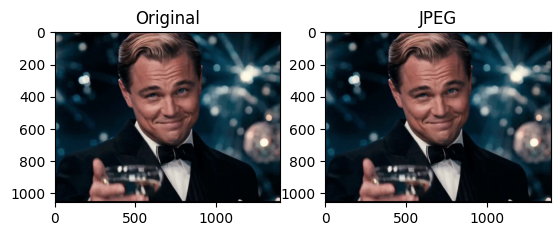

Componente în frecvență:3282489
Componente în frecvență după cuantizare: 599017


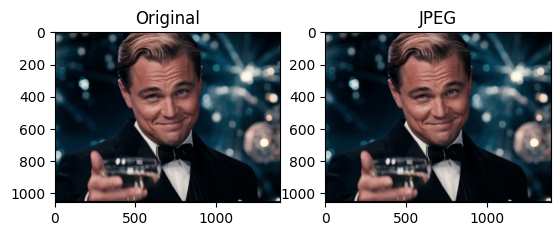

Componente în frecvență:3267019
Componente în frecvență după cuantizare: 600351


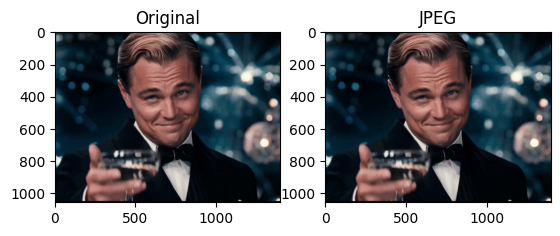

Componente în frecvență:3318204
Componente în frecvență după cuantizare: 605267


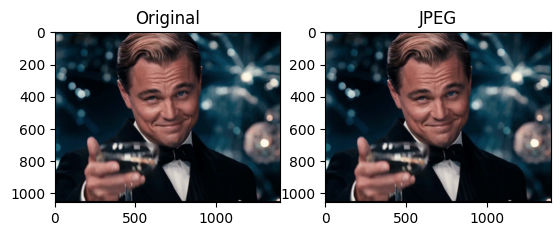

Componente în frecvență:3214323
Componente în frecvență după cuantizare: 601332


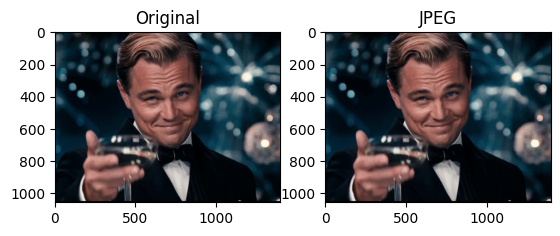

Componente în frecvență:3349019
Componente în frecvență după cuantizare: 612799


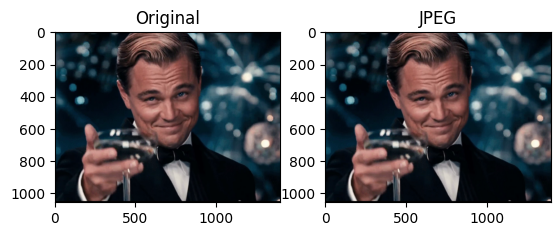

Componente în frecvență:3341068
Componente în frecvență după cuantizare: 615970


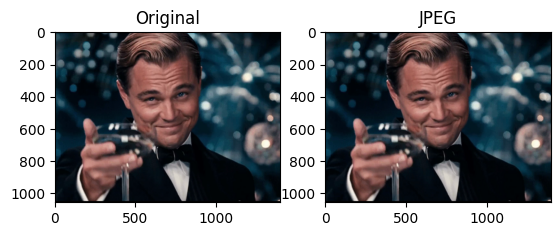

Componente în frecvență:3369415
Componente în frecvență după cuantizare: 618411


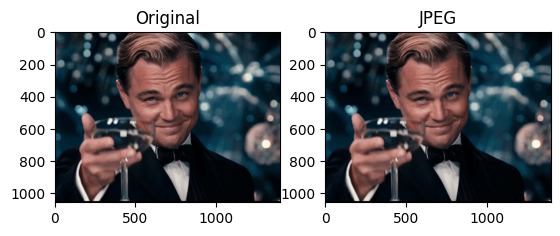

Componente în frecvență:3285681
Componente în frecvență după cuantizare: 618121


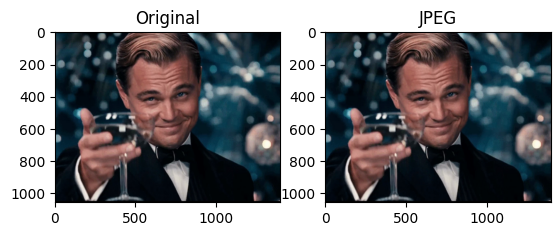

Componente în frecvență:3409138
Componente în frecvență după cuantizare: 622351


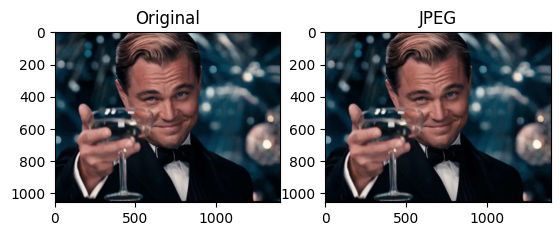

Componente în frecvență:3395255
Componente în frecvență după cuantizare: 627026


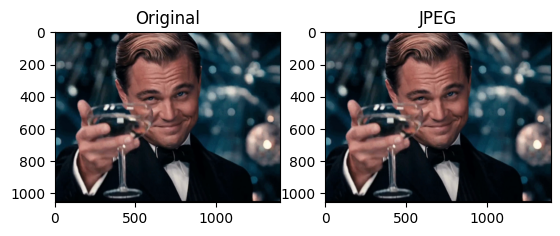

Componente în frecvență:3432461
Componente în frecvență după cuantizare: 623675


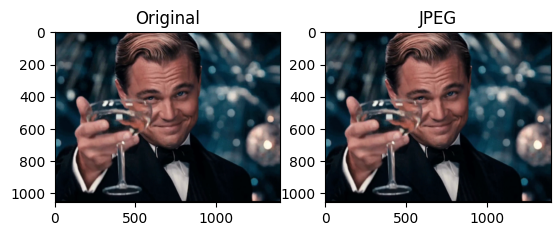

Componente în frecvență:3328693
Componente în frecvență după cuantizare: 618423


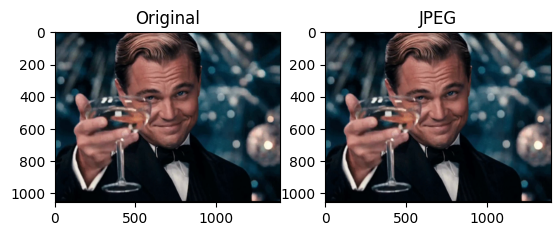

In [10]:
# sarcina 4 
import cv2 

video = cv2.VideoCapture('short_video.mp4')

success, frame = video.read()
while success:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = pad_image(frame_rgb)
    frame_compressed = compress_jpeg_color(frame_rgb)
    plt.subplot(121).imshow(frame_rgb)
    plt.title('Original')
    plt.subplot(122).imshow(frame_compressed)
    plt.title('JPEG')
    plt.show()
    success, frame = video.read()

video.release()